In [1]:
%matplotlib inline
%matplotlib widget

import matplotlib as mpl
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif', size = 18)

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [123]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
try:
    import mpld3
    mpld3.enable_notebook()
    print("Modul mpld3 je instaliran.")
except:
    print("Modul mpld3 nije instaliran.")
    
def plotSpectrum(x, xlabel = "", ylabel="", title="", show=True):
    n = len(x)
    plt.plot(np.fft.fftshift(np.fft.fftfreq(n)),np.fft.fftshift(abs(np.fft.fft(x))));
    plt.xlabel(xlabel); plt.ylabel(ylabel); plt.title(title);
    if show:
        plt.show()
        
def plotSpectrumdB(x, xlabel = "", ylabel="", title="", show=True):
    n = len(x)
    plt.plot(np.fft.fftshift(np.fft.fftfreq(n)),20*np.log10(np.fft.fftshift(abs(np.fft.fft(x)))));
    plt.xlabel(xlabel); plt.ylabel(ylabel); plt.title(title);
    if show:
        plt.show()
    
def stemSpectrum(x, xlabel = "", ylabel="", title="", show=True):
    n = len(x)
    F = np.fft.fftshift(np.fft.fftfreq(n))
    X = np.fft.fftshift(abs(np.fft.fft(x)))
    plt.stem(F, X)#, use_line_collection=True);
    plt.xlabel(xlabel); plt.ylabel(ylabel); plt.title(title);
    if show:
        plt.show()

def plotSignal(x, xlabel = "", ylabel="", title="", show=True):
    plt.plot(x);
    plt.xlabel(xlabel); plt.ylabel(ylabel); plt.title(title);
    if show:
        plt.show()

def stemSignal(x, xlabel = "", ylabel="", title="", show=True):
    plt.stem(x)# ,use_line_collection=True);
    plt.xlabel(xlabel); plt.ylabel(ylabel); plt.title(title);
    if show:
        plt.show()

def genTestSpectrum(n, freq, amp, randPhase=False):
    # Generate test spectrum
    # Arguments:
    #    n    - number of samples
    #    freq - tuple of digital frequencies (startFreq, endFreq) in range (0, 0.5)
    #    amp  - tuple of amplitudes (ampStart, ampEnd)
    #    randPhase - if True, assign random phase to each sample
    x = np.zeros(n, dtype='complex128')
    freqStart, freqEnd = freq
    ampStart, ampEnd = amp
    indStart = round(n*freqStart)
    indEnd = round(n*freqEnd)
    x[indStart:indEnd] = ampStart - np.linspace(0, 1, num=indEnd-indStart) * (ampStart-ampEnd)
    if randPhase:
        x[indStart:indEnd] *= np.exp(1j*2*np.pi*np.random.rand(indEnd-indStart)) # randomize phase
    x[0] = abs(x[1])/2
    timeDomain = np.fft.ifft(x)
    return(timeDomain)

def compressor(x, D):
    # Downsample the signal by factor D
    #   x - input signal
    #   D - downsampling factor
    return x[0::D]

def expander(x, I):
    # Upsample the signal by factor I
    #   x - input signal
    #   I - upsampling factor
    nx = len(x)
    xI = np.zeros(nx*I)
    xI[::I] = x
    return xI

def readSamples(fileName):
    samples = []
    inFile = open(fileName, "r")
    for line in inFile:
        samples.append( complex(line) )
    return np.array(samples)

Modul mpld3 je instaliran.


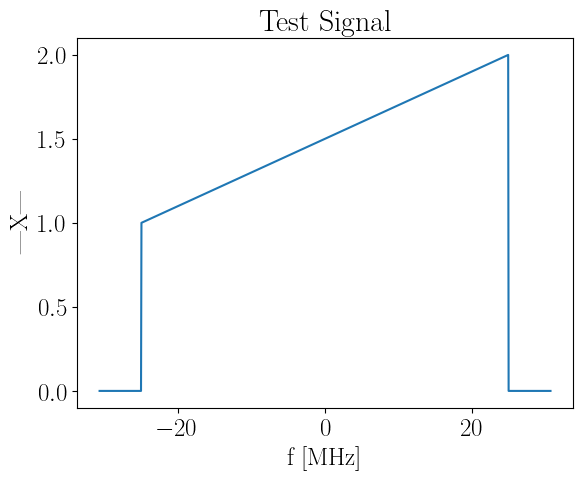

In [134]:
testsignal = readSamples("testsignal.txt")

fs = 61.44e6
N = len(testsignal)
M = 4 # Width of reconstruction pulse

freqs = (np.arange(N)/N - 0.5) * fs/1e6
plt.plot(freqs, np.fft.fftshift(abs(np.fft.fft(testsignal))))
plt.xlabel("f [MHz]")
plt.ylabel("|X|");
plt.title("Test Signal");

In [ ]:
nzr = np.ones(M, dtype = complex)


# Pitati

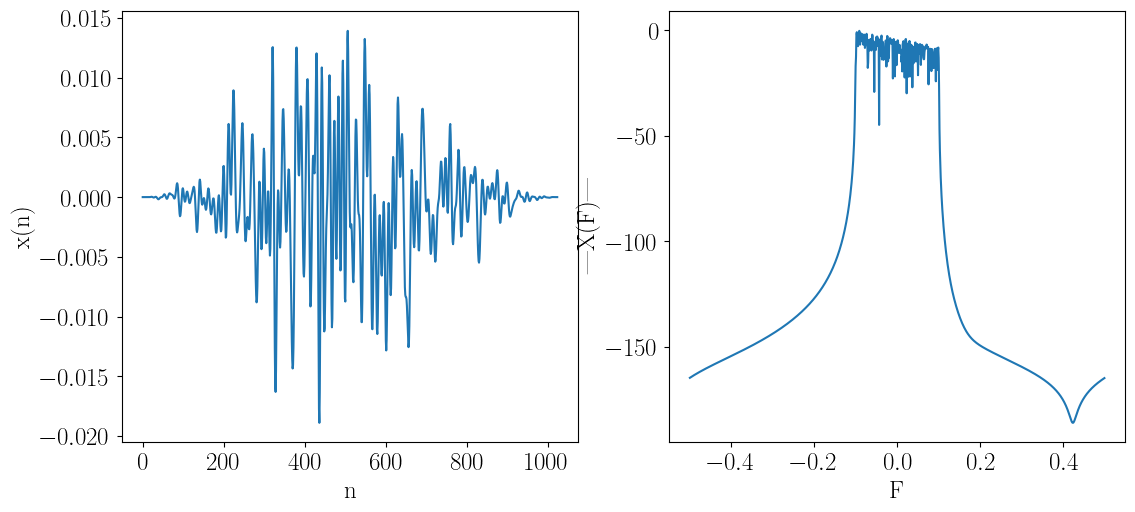

In [111]:
N = 1024
f_max = 0.2
f = [0.0, f_max]
a = [1.0, 0.4]
x = genTestSpectrum(N, f, a, True)

Omega0 = 2*np.pi*f_max/2
n = np.arange(len(x))
cplx_sine = np.exp(1j*n*(-Omega0))
x_shifted = x * cplx_sine

win = signal.hann(len(x_shifted), False)
# x_shifted *= win
x_shifted_r = x_shifted.real*win
x_shifted_i = x_shifted.imag*win
x_shifted = x_shifted_r + 1j*x_shifted_i
                         
figH = 4
plt.subplots(1,2,figsize=(2*1.618*figH,1.4*figH))
plt.subplot(1,2,1)
plotSignal(x_shifted, 'n', 'x(n)', show=False)
plt.subplot(1,2,2)
plotSpectrumdB(x_shifted, 'F', '|X(F)|')

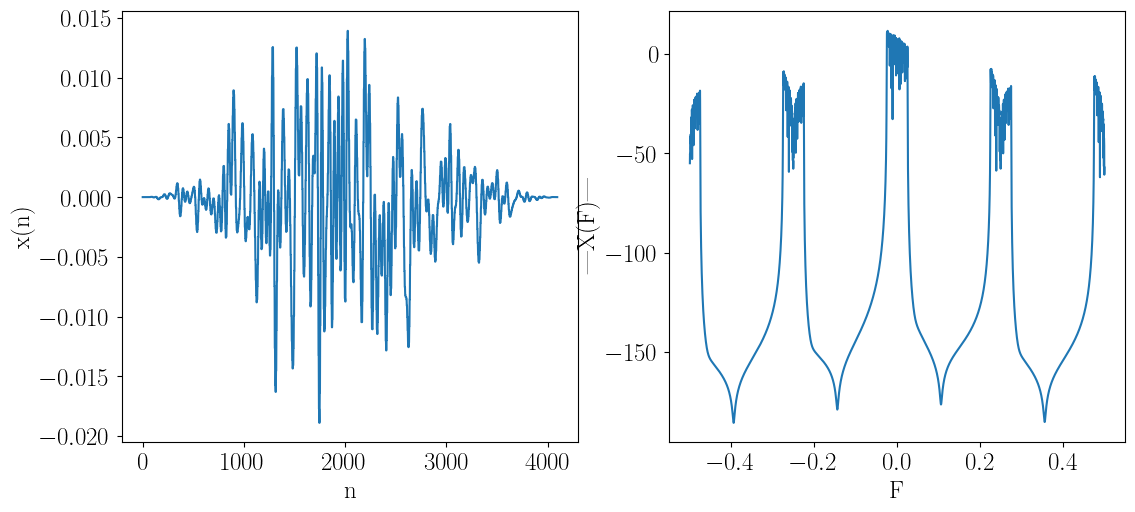

In [112]:
M = 4
nrz = np.ones(M, dtype = complex)
x_upsampled = np.zeros((len(x_shifted)-1)*M+1, dtype = complex)
x_upsampled[::M] = x_shifted

x_nrz = np.convolve(x_upsampled, nrz)

figH = 4
plt.subplots(1,2,figsize=(2*1.618*figH,1.4*figH))
plt.subplot(1,2,1)
plotSignal(x_nrz, 'n', 'x(n)', show=False)
plt.subplot(1,2,2)
plotSpectrumdB(x_nrz, 'F', '|X(F)|')

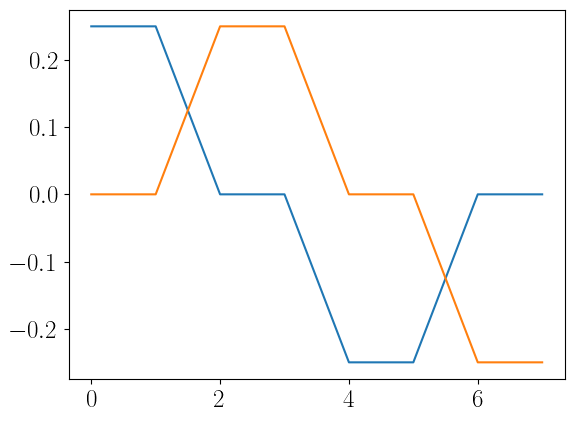

In [51]:
M = 8
rfi = np.ones(M) / (M/2)
rfi[M//4:M//2] = 0
rfi[M//2:3*M//4] = -1 / (M/2)
rfi[3*M//4:] = 0
rfq = np.ones(M) / (M/2)
rfq[:M//4] = 0
rfq[M//2:3*M//4]=0
rfq[3*M//4:] = -1 / (M/2)

plt.plot(rfi)
plt.plot(rfq)

In [52]:
x_rfi = signal.lfilter(rfi, 1, x.real)
x_rfq = signal.lfilter(rfq, 1, x.imag)
x_rfiq = x_rfi + x_rfq
# x_rfiq = 2*x_rfiq.real

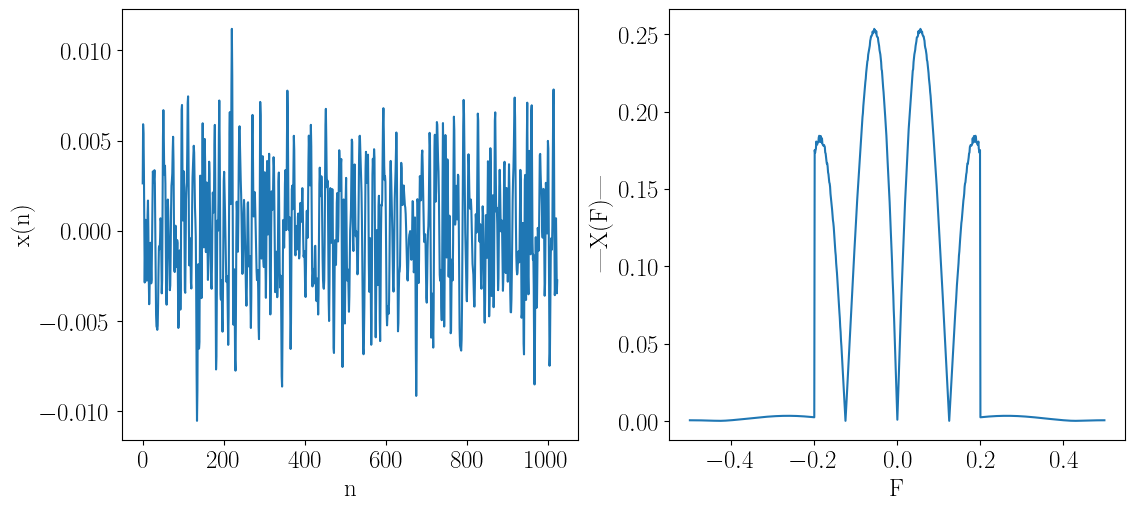

In [53]:
figH = 4
plt.subplots(1,2,figsize=(2*1.618*figH,1.4*figH))
plt.subplot(1,2,1)
plotSignal(x_rfiq, 'n', 'x(n)', show=False)
plt.subplot(1,2,2)
plotSpectrum(x_rfiq, 'F', '|X(F)|')

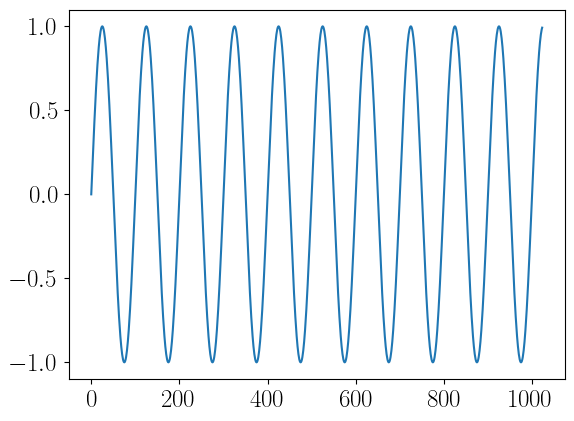

In [116]:
N = 1024
n = np.arange(N)
f = 10
fs = 1e3
T = 1/fs

x = np.sin(2*np.pi*n*f/fs) 

plt.plot(x)

In [121]:
M = 4
nrz = np.ones(M, dtype = complex)
rz = np.ones(M)
rz[M//2:] = 0

x_upsampled = np.zeros((len(x)-1)*M+1, dtype = complex)
x_upsampled[::M] = x

x_nrz = np.convolve(nrz, x_upsampled)
x_rz = np.convolve(rz, x_upsampled)
# x_nrz = signal.lfilter(nrz, 1, x_upsampled)
# x_rz = signal.lfilter(rz, 1, x_upsampled) 

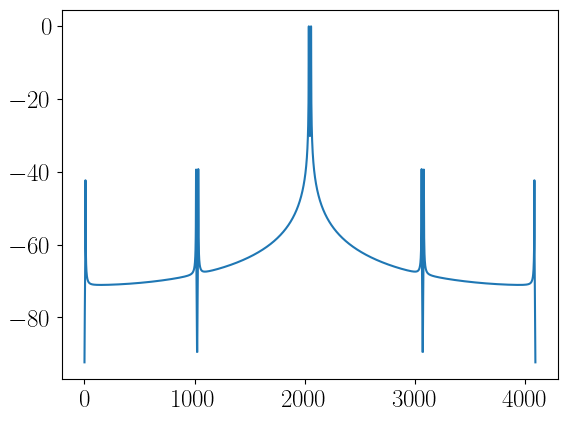

In [122]:
XnrzdB = 20*np.log10(np.fft.fftshift(abs(np.fft.fft(x_nrz))))
# freqs_nrz = (np.arange(N*M*len(nrz))/(N*M*len(nrz)) - 0.5) * M*fs*len(nrz)/1e6
plt.plot(XnrzdB-np.max(XnrzdB))
# plt.plot(XrdB-np.max(XrdB),'r')

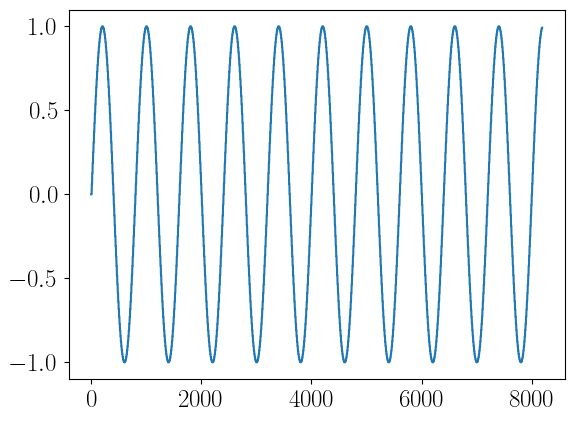

In [72]:
plt.plot(x_nrz)
# plt.plot(x)

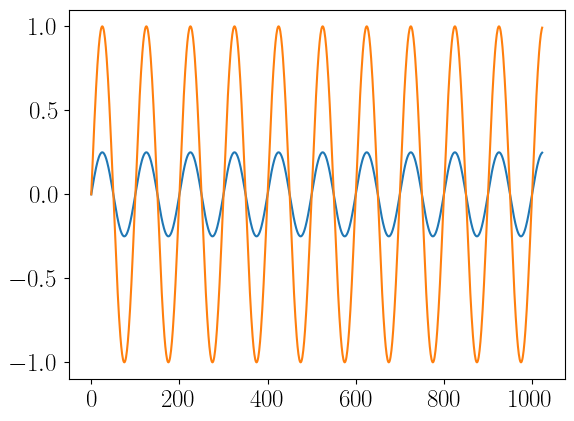

In [64]:
plt.plot(x_rz)
plt.plot(x)